In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#from google.colab import drive
#drive.mount('/content/drive')

# Análisis exploratorio

In [4]:
df = pd.read_csv('./train_airlines_delay_challenge.csv')
# df = pd.read_csv('/content/drive/MyDrive/train_airlines_delay_challenge.csv')
print(df.shape)
df.head()

(9000000, 14)


,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,CRS_ARR_TIME,ARR_DELAY,CRS_ELAPSED_TIME,DISTANCE
0,2009-09-05,AA,2062,MIA,BOS,1055.0,1139.0,44.0,15.0,1154.0,1405.0,30.0,190.0,1258.0
1,2009-05-08,XE,2926,IAH,ELP,2115.0,2112.0,-3.0,17.0,2129.0,2219.0,-15.0,124.0,667.0
2,2009-03-16,OH,6433,CVG,DSM,1430.0,1425.0,-5.0,25.0,1450.0,1518.0,7.0,108.0,505.0
3,2009-03-04,OO,5439,LAX,SBA,820.0,814.0,-6.0,15.0,829.0,905.0,-11.0,45.0,89.0
4,2009-06-12,WN,615,LAS,MCI,1235.0,1234.0,-1.0,13.0,1247.0,1735.0,-26.0,180.0,1140.0


Se carga el dataset y observa su composición asi como el total de filas y columnas.

In [6]:
# Tipo de atributos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000000 entries, 0 to 8999999
Data columns (total 14 columns):
 #   Column             Dtype  
---  ------             -----  
 0   FL_DATE            object 
 1   OP_CARRIER         object 
 2   OP_CARRIER_FL_NUM  int64  
 3   ORIGIN             object 
 4   DEST               object 
 5   CRS_DEP_TIME       float64
 6   DEP_TIME           float64
 7   DEP_DELAY          float64
 8   TAXI_OUT           float64
 9   WHEELS_OFF         float64
 10  CRS_ARR_TIME       float64
 11  ARR_DELAY          float64
 12  CRS_ELAPSED_TIME   float64
 13  DISTANCE           float64
dtypes: float64(9), int64(1), object(4)
memory usage: 961.3+ MB


## Descripción de los atributos

- **`FL_DATE`**: Fecha de vuelo
- **`OP_CARRIER`**: Identificador de la aerolínea
- **`OP_CARRIER_FL_NUM`**: Número de vuelo
- **`ORIGIN`**: Código del aeropuerto de origen
- **`DEST`**: Código del aeropuerto de destino
- **`CRS_DEP_TIME`**: Hora planeada de salida
- **`DEP_TIME`**: Hora actual de salida
- **`DEP_DELAY`**: Retraso en la salida (en minutos)
- **`TAXI_OUT`**: El tiempo transcurrido entre la salida desde el aeropuerto de origen y el atributo "WHEELS_OFF"
- **`WHEELS_OFF`**: Hora a la que las llantas del avión dejaron de tocar el suelo
- **`CRS_ARR_TIME`**: Hora planeada de llegada
- **`ARR_DELAY`**: Retraso total en la llegada en minutos (atributo a predecir)
- **`CRS_ELAPSED_TIME`**: Tiempo total planeado del vuelo
- **`DISNTANCE`**: Distancia entre los dos aeropuertos

In [8]:
# Revisar valores nulos
df.isnull().sum()

FL_DATE              0
OP_CARRIER           0
OP_CARRIER_FL_NUM    0
ORIGIN               0
DEST                 0
CRS_DEP_TIME         0
DEP_TIME             0
DEP_DELAY            0
TAXI_OUT             0
WHEELS_OFF           0
CRS_ARR_TIME         0
ARR_DELAY            0
CRS_ELAPSED_TIME     0
DISTANCE             0
dtype: int64

In [9]:
df['OP_CARRIER'].unique() # Todos los identificadores de aerolíneas

array(['AA', 'XE', 'OH', 'OO', 'WN', 'EV', 'YV', 'NW', 'UA', 'MQ', 'F9',
       'US', 'FL', 'CO', 'AS', 'DL', 'B6', 'HA', '9E', 'VX', 'NK'],
      dtype=object)

### Identificador y Aerolínea
| Código | Aerolínea |
| ------ | ---------- |
| **AA** | *American Airlines* |
| **AS** | *Alaska Airlines* |
| **B6** | *JetBlue Airways* |
| **CO** | *Continental Airlines (ahora parte de United Airlines)* |
| **DL** | *Delta Air Lines* |
| **EV** | *Envoy Air (operando como American Eagle)* |
| **FL** | *AirTran Airways (ahora parte de Southwest Airlines)* |
| **F9** | *Frontier Airlines* |
| **HA** | *Hawaiian Airlines* |
| **MQ** | *Envoy Air (operando como American Eagle)* |
| **NK** | *Spirit Airlines* |
| **NW** | *Northwest Airlines (ahora parte de Delta Air Lines)* |
| **OO** | *SkyWest Airlines* |
| **OH** | *PSA Airlines (operando como American Eagle)* |
| **UA** | *United Airlines* |
| **US** | *US Airways (ahora parte de American Airlines)* |
| **VX** | *Virgin America (ahora parte de Alaska Airlines)* |
| **WN** | *Southwest Airlines* |
| **XE** | *ExpressJet Airlines* |
| **YV** | *Mesa Airlines* |
| **9E** | *Pinnacle Airlines* |

In [11]:
# Revisando duplicados
dup_total = df.duplicated().sum()
if dup_total > 0:
    print(dup_total) # Total de duplicados
    # Mostrar los primeros 5 duplicados
    dup = df[df.duplicated()]
    print(dup.head())

27522
          FL_DATE OP_CARRIER  OP_CARRIER_FL_NUM ORIGIN DEST  CRS_DEP_TIME  \
932    2009-09-09         WN                635    PHX  CMH         945.0   
13937  2009-09-04         OO               4716    SLC  GTF        1056.0   
16722  2009-09-26         FL                129    TPA  ATL        1840.0   
24106  2009-09-09         MQ               4631    RDU  DCA        1200.0   
25345  2009-09-19         9E               3846    FWA  DTW         645.0   

       DEP_TIME  DEP_DELAY  TAXI_OUT  WHEELS_OFF  CRS_ARR_TIME  ARR_DELAY  \
932       954.0        9.0       8.0      1002.0        1625.0        6.0   
13937    1059.0        3.0       8.0      1107.0        1225.0       -7.0   
16722    1845.0        5.0      88.0      2013.0        2010.0       78.0   
24106    1153.0       -7.0      12.0      1205.0        1300.0       -8.0   
25345     638.0       -7.0      21.0       659.0         745.0       -9.0   

       CRS_ELAPSED_TIME  DISTANCE  
932               220.0    1671.

Como se puede apreciar existen valores duplicados en el dataframe siendo un total de 27,522.

# Limpieza de datos

## Eliminando los duplicados
Se eliminan los duplicados y se revisa que así sea.

In [15]:
df = df.drop_duplicates() # Elimiando los valores duplicados

In [16]:
print(df.duplicated().sum()) # Revisando nuevamente por valores duplicados

0


### ¿Cúales son los datos de vuelo con retraso?
- **Si en `ARR_DELAY` es positivo quiere decir que llegó con retraso el avión**
- **Si en `DEP_DELAY` es positivo quiere decir que salió con retrso el avión**

In [18]:
# Retraso en la llegada (min)
df[df['ARR_DELAY'] > 0]

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,CRS_ARR_TIME,ARR_DELAY,CRS_ELAPSED_TIME,DISTANCE
0,2009-09-05,AA,2062,MIA,BOS,1055.0,1139.0,44.0,15.0,1154.0,1405.0,30.0,190.0,1258.0
2,2009-03-16,OH,6433,CVG,DSM,1430.0,1425.0,-5.0,25.0,1450.0,1518.0,7.0,108.0,505.0
6,2009-06-04,EV,5421,FAY,ATL,1633.0,1653.0,20.0,8.0,1701.0,1754.0,38.0,81.0,331.0
13,2009-09-18,UA,402,MCI,ORD,1450.0,1446.0,-4.0,22.0,1508.0,1615.0,4.0,85.0,403.0
14,2009-02-02,YV,7070,ORD,GSP,1813.0,1807.0,-6.0,21.0,1828.0,2100.0,1.0,107.0,577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8999982,2017-10-25,AA,1867,CLT,BNA,2019.0,2012.0,-7.0,23.0,2035.0,2039.0,4.0,80.0,328.0
8999987,2017-08-17,WN,1186,BOI,DEN,1510.0,1630.0,80.0,13.0,1643.0,1655.0,76.0,105.0,649.0
8999994,2017-07-18,AA,2433,MCO,DFW,1735.0,1947.0,132.0,14.0,2001.0,1925.0,116.0,170.0,985.0
8999996,2017-01-06,OO,4482,SEA,SMF,2105.0,2113.0,8.0,23.0,2136.0,2306.0,7.0,121.0,605.0


In [19]:
# Retraso en la salida (min)
df[df['DEP_DELAY'] > 0]

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,CRS_ARR_TIME,ARR_DELAY,CRS_ELAPSED_TIME,DISTANCE
0,2009-09-05,AA,2062,MIA,BOS,1055.0,1139.0,44.0,15.0,1154.0,1405.0,30.0,190.0,1258.0
5,2009-08-04,WN,94,OAK,PHX,600.0,603.0,3.0,9.0,612.0,805.0,-8.0,125.0,646.0
6,2009-06-04,EV,5421,FAY,ATL,1633.0,1653.0,20.0,8.0,1701.0,1754.0,38.0,81.0,331.0
10,2009-09-03,NW,1717,JFK,MSP,1955.0,2002.0,7.0,25.0,2027.0,2233.0,-44.0,218.0,1028.0
12,2009-06-23,MQ,4060,ORD,FNT,2105.0,2106.0,1.0,19.0,2125.0,2305.0,0.0,60.0,223.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8999987,2017-08-17,WN,1186,BOI,DEN,1510.0,1630.0,80.0,13.0,1643.0,1655.0,76.0,105.0,649.0
8999994,2017-07-18,AA,2433,MCO,DFW,1735.0,1947.0,132.0,14.0,2001.0,1925.0,116.0,170.0,985.0
8999996,2017-01-06,OO,4482,SEA,SMF,2105.0,2113.0,8.0,23.0,2136.0,2306.0,7.0,121.0,605.0
8999997,2017-09-24,WN,3997,DEN,SNA,1400.0,1436.0,36.0,11.0,1447.0,1520.0,33.0,140.0,846.0


In [20]:
# Retraso en la salida y en la llegada
df[(df['DEP_DELAY'] > 0) & (df['ARR_DELAY'] > 0)]

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,CRS_ARR_TIME,ARR_DELAY,CRS_ELAPSED_TIME,DISTANCE
0,2009-09-05,AA,2062,MIA,BOS,1055.0,1139.0,44.0,15.0,1154.0,1405.0,30.0,190.0,1258.0
6,2009-06-04,EV,5421,FAY,ATL,1633.0,1653.0,20.0,8.0,1701.0,1754.0,38.0,81.0,331.0
18,2009-12-05,YV,2967,EWR,CLT,1825.0,1935.0,70.0,65.0,2040.0,2027.0,103.0,122.0,529.0
21,2009-06-17,WN,867,LAS,SAN,1445.0,1517.0,32.0,18.0,1535.0,1550.0,30.0,65.0,258.0
25,2009-09-02,CO,438,EWR,MIA,1055.0,1100.0,5.0,19.0,1119.0,1354.0,21.0,179.0,1086.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8999981,2017-06-04,WN,4310,MCI,DAL,730.0,740.0,10.0,11.0,751.0,900.0,6.0,90.0,460.0
8999987,2017-08-17,WN,1186,BOI,DEN,1510.0,1630.0,80.0,13.0,1643.0,1655.0,76.0,105.0,649.0
8999994,2017-07-18,AA,2433,MCO,DFW,1735.0,1947.0,132.0,14.0,2001.0,1925.0,116.0,170.0,985.0
8999996,2017-01-06,OO,4482,SEA,SMF,2105.0,2113.0,8.0,23.0,2136.0,2306.0,7.0,121.0,605.0


**El atributo de `DEP_DELAY` nos dice si salió con retraso el avión pero esto no es contundente para decir que el avión llegará al destino con retraso:**
- El avión puede salir con retraso y llegar en tiempo a su destino    

# Procesamiento de datos

In [23]:
df_1 = df.copy()
# Cambiando la columna ARR_DELAY a categorica
df_1['ARR_DELAY'] = df_1['ARR_DELAY'].apply(lambda x: 'delay' if x > 15
                                          else 'on time' if -15 <= x <= 15
                                          else 'early' if x < -15 else 'unknown')

Se tienen 3 categorias para `ARR_DELAY`:
1) **early** si el avión llega más de 15 minutos antes de la hora planeada de llegada.
2) **on time** si el avión llega dentro de ±15 minutos de la hora planeada de llegada.
3) **delay** si el avión llega más de 15 minutos después de la hora planeada de llegada.

In [25]:
df_1.head()

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,CRS_ARR_TIME,ARR_DELAY,CRS_ELAPSED_TIME,DISTANCE
0,2009-09-05,AA,2062,MIA,BOS,1055.0,1139.0,44.0,15.0,1154.0,1405.0,delay,190.0,1258.0
1,2009-05-08,XE,2926,IAH,ELP,2115.0,2112.0,-3.0,17.0,2129.0,2219.0,on time,124.0,667.0
2,2009-03-16,OH,6433,CVG,DSM,1430.0,1425.0,-5.0,25.0,1450.0,1518.0,on time,108.0,505.0
3,2009-03-04,OO,5439,LAX,SBA,820.0,814.0,-6.0,15.0,829.0,905.0,on time,45.0,89.0
4,2009-06-12,WN,615,LAS,MCI,1235.0,1234.0,-1.0,13.0,1247.0,1735.0,early,180.0,1140.0


In [26]:
# Revisando que no se tengan unknowns en el dataframe
has_unknown = df_1['ARR_DELAY'].isin(['unknown']).any()

print("¿Hay algún 'unknown' en ARR_DELAY?", has_unknown)

¿Hay algún 'unknown' en ARR_DELAY? False


### Visualizando los retrasos de vuelos por compañia

In [28]:
# Cambiando el código de la aerolínea por su nombre para una mejor visualización gráfica.
df_2 = df_1.copy()

air_lines = {
    'AA': 'American Airlines',
    'AS': 'Alaska Airlines',
    'B6': 'JetBlue Airways',
    'CO': 'Continental Airlines',
    'DL': 'Delta Air Lines',
    'EV': 'Envoy Air',
    'F9': 'Frontier Airlines',
    'FL': 'AirTran Airways',
    'HA': 'Hawaiian Airlines',
    'MQ': 'Envoy Air',
    'NK': 'Spirit Airlines',
    'NW': 'Northwest Airlines',
    'OO': 'SkyWest Airlines',
    'OH': 'PSA Airlines',
    'UA': 'United Airlines',
    'US': 'US Airways',
    'VX': 'Virgin America',
    'WN': 'Southwest Airlines',
    'XE': 'ExpressJet Airlines',
    'YV': 'Mesa Airlines',
    '9E': 'Pinnacle Airlines'
}

# Cambiando los codigos a nombre para una mejor representacion grafica
df_2['OP_CARRIER'] = df_2['OP_CARRIER'].replace(air_lines)

In [29]:
# Contar los retrasos por compañía
delay_counts = df_2[df_2['ARR_DELAY'] == 'delay']['OP_CARRIER'].value_counts()

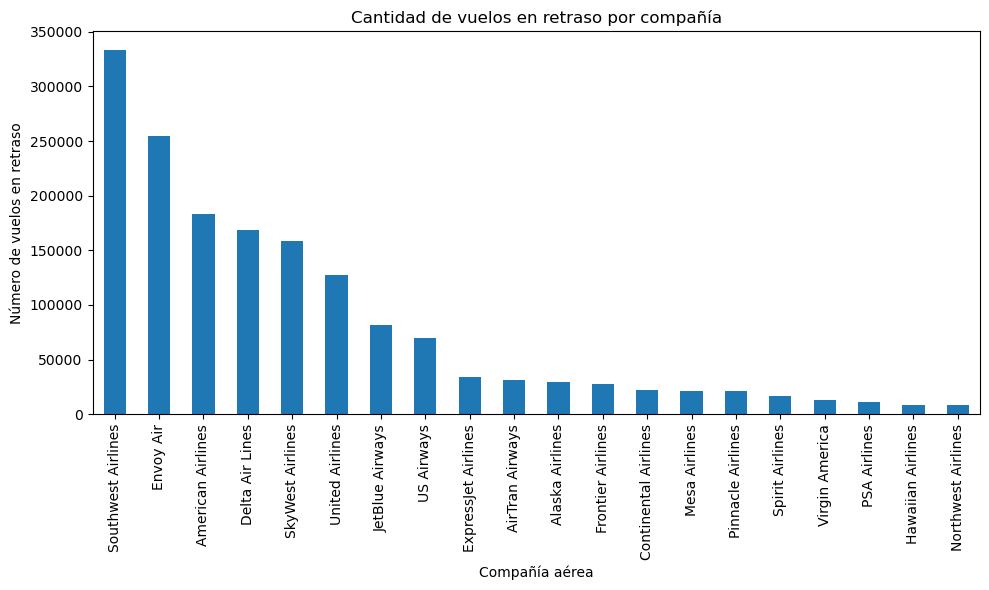

In [30]:
plt.figure(figsize=(10, 6))
delay_counts.plot(kind='bar')
plt.title('Cantidad de vuelos en retraso por compañía')
plt.xlabel('Compañía aérea')
plt.ylabel('Número de vuelos en retraso')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### Ahora se visualizan los retrasos en vuelos por semana, mes y año

In [32]:
df_3 = df_2.copy()

df_3['FLY_WEEK'] = pd.to_datetime(df_3['FL_DATE']).dt.dayofweek
df_3['FLY_MONTH'] = pd.to_datetime(df_3['FL_DATE']).dt.month
df_3['FLY_YEAR'] = pd.to_datetime(df_3['FL_DATE']).dt.year

In [33]:
df_3.head()

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,CRS_ARR_TIME,ARR_DELAY,CRS_ELAPSED_TIME,DISTANCE,FLY_WEEK,FLY_MONTH,FLY_YEAR
0,2009-09-05,American Airlines,2062,MIA,BOS,1055.0,1139.0,44.0,15.0,1154.0,1405.0,delay,190.0,1258.0,5,9,2009
1,2009-05-08,ExpressJet Airlines,2926,IAH,ELP,2115.0,2112.0,-3.0,17.0,2129.0,2219.0,on time,124.0,667.0,4,5,2009
2,2009-03-16,PSA Airlines,6433,CVG,DSM,1430.0,1425.0,-5.0,25.0,1450.0,1518.0,on time,108.0,505.0,0,3,2009
3,2009-03-04,SkyWest Airlines,5439,LAX,SBA,820.0,814.0,-6.0,15.0,829.0,905.0,on time,45.0,89.0,2,3,2009
4,2009-06-12,Southwest Airlines,615,LAS,MCI,1235.0,1234.0,-1.0,13.0,1247.0,1735.0,early,180.0,1140.0,4,6,2009


In [34]:
# Contar los retrasos por días de la semana
delay_counts_month = df_3[df_3['ARR_DELAY'] == 'delay']['FLY_WEEK'].value_counts()

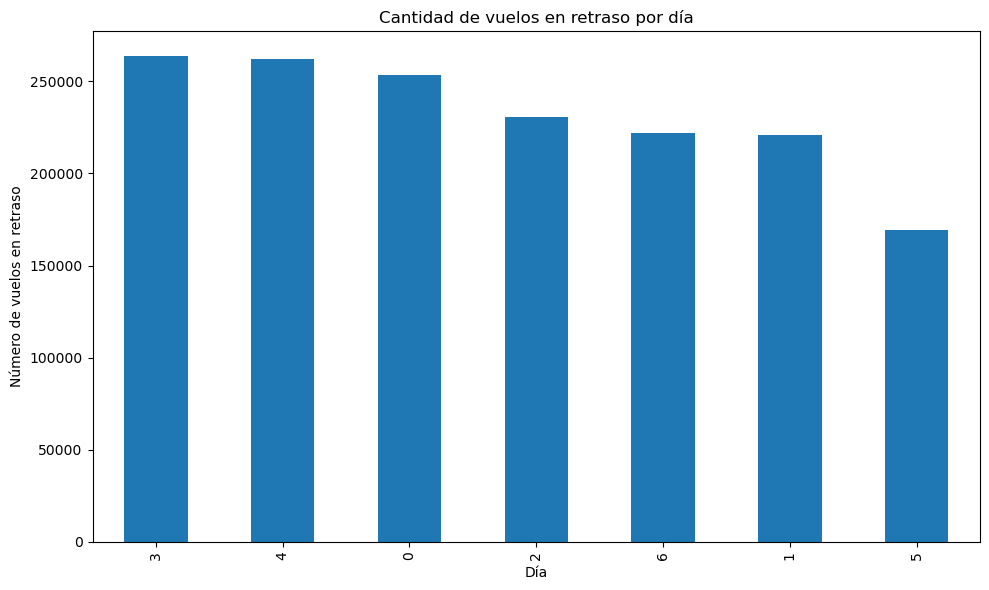

In [35]:
plt.figure(figsize=(10, 6))
delay_counts_month.plot(kind='bar')
plt.title('Cantidad de vuelos en retraso por día')
plt.xlabel('Día')
plt.ylabel('Número de vuelos en retraso')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [36]:
# Contar los retrasos por mes
delay_counts_month = df_3[df_3['ARR_DELAY'] == 'delay']['FLY_MONTH'].value_counts()

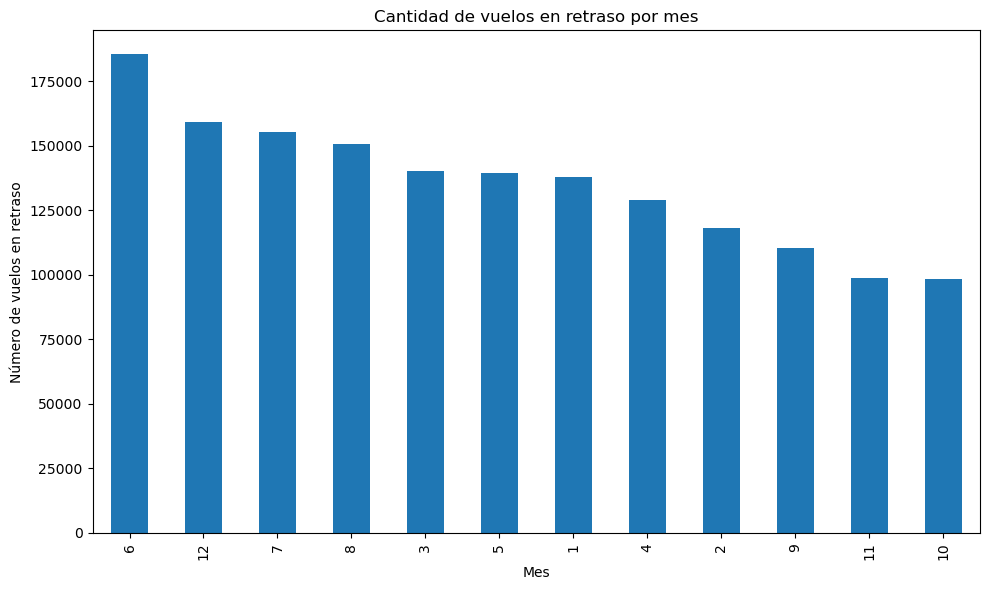

In [37]:
plt.figure(figsize=(10, 6))
delay_counts_month.plot(kind='bar')
plt.title('Cantidad de vuelos en retraso por mes')
plt.xlabel('Mes')
plt.ylabel('Número de vuelos en retraso')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [38]:
delay_counts_year = df_3[df_3['ARR_DELAY'] == 'delay']['FLY_YEAR'].value_counts()

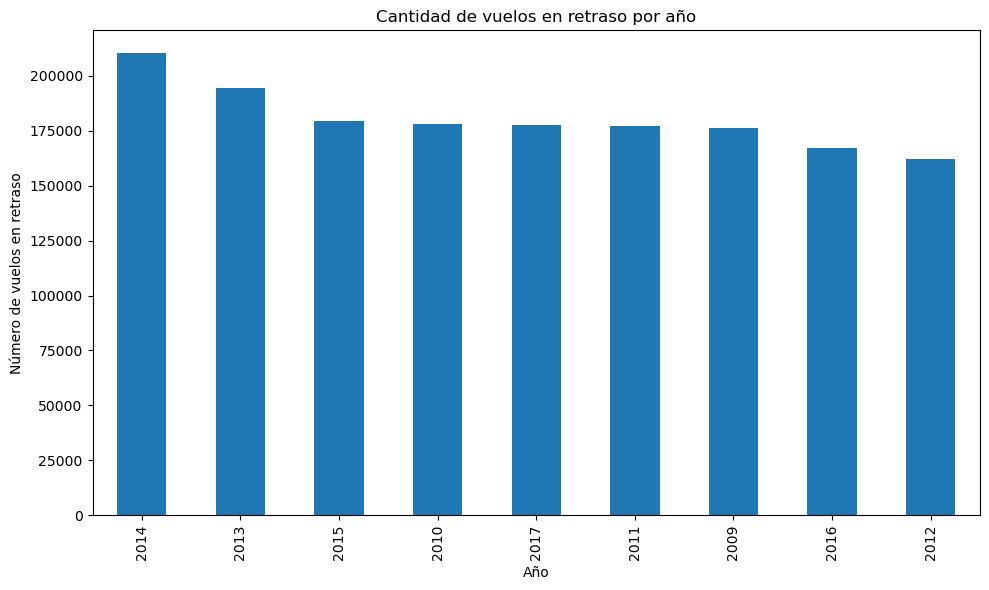

In [39]:
plt.figure(figsize=(10, 6))
delay_counts_year.plot(kind='bar')
plt.title('Cantidad de vuelos en retraso por año')
plt.xlabel('Año')
plt.ylabel('Número de vuelos en retraso')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [192]:
df_3.head()

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,...,ARR_DELAY,CRS_ELAPSED_TIME,DISTANCE,FLY_WEEK,FLY_MONTH,FLY_YEAR,REAL_FLY_TIME,DIF_TIME,ARR_TOTAL,MD_SPEED
0,2012-04-19,Envoy Air,3245,DFW,LEX,940.0,1018.0,38.0,12.0,1030.0,...,delay,125.0,785.0,3,4,2012,0.200000,124.800000,4908.0,3925.0
1,2015-04-24,American Airlines,2214,DFW,SAT,905.0,1224.0,199.0,26.0,1250.0,...,delay,76.0,247.0,4,4,2015,0.433333,75.566667,58515.0,570.0
2,2009-06-10,ExpressJet Airlines,5682,ORD,TYS,1410.0,1455.0,45.0,10.0,1505.0,...,delay,106.0,475.0,2,6,2009,0.833333,105.166667,681.0,570.0
3,2012-07-26,Southwest Airlines,2592,DEN,SJC,1615.0,1650.0,35.0,9.0,1659.0,...,delay,160.0,948.0,3,7,2012,0.150000,159.850000,14887.0,6320.0
4,2014-01-04,Southwest Airlines,2008,AUS,EWR,1020.0,1049.0,29.0,8.0,1057.0,...,delay,220.0,1504.0,5,1,2014,0.133333,219.866667,13239.0,11280.0


**Se crean nuevas columnas que pueden ser interesantes**

In [41]:
df_3['REAL_FLY_TIME'] = (df_3['WHEELS_OFF'] - df_3['DEP_TIME']) / 60
df_3['DIF_TIME'] = df_3['CRS_ELAPSED_TIME'] - df_3['REAL_FLY_TIME']
df_3['ARR_TOTAL'] = df_3.groupby(['ORIGIN', 'DEST'])['DEP_DELAY'].cumsum()

# Calcular la velocidad promedio
df_3['MD_SPEED'] = df_3['DISTANCE'] / df_3['REAL_FLY_TIME']

In [42]:
delay = df_3[df_3["ARR_DELAY"] == "delay"].value_counts()
on_time = df_3[df_3["ARR_DELAY"] == "on time"].value_counts()
early = df_3[df_3["ARR_DELAY"] == "early"].value_counts()

txt = f'''
Total de:
delay: {delay.shape}
on time: {on_time.shape}
early: {early.shape}
'''
print(txt)


Total de:
delay: (1622196,)
on time: (5753458,)
early: (1596824,)



In [43]:
import warnings
warnings.filterwarnings('ignore')

print("Antes: ",df_3.shape)
min = 1596824 # early
df_3 = df_3.groupby('ARR_DELAY').apply(lambda x: x.sample(min, random_state=42)).reset_index(drop=True)
print("Despues: ",df_3.shape)

Antes:  (8972478, 21)
Despues:  (4790472, 21)


Se balancean los datos de la varriable objetivo para evitar tendecias a on_time ya que es la que aparece mas veces

In [44]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df_4 = df_3.copy()

arr_delay = {
    "delay": 0,
    "on time": 1,
    "early": 2
}

df_2['ARR_DELAY'] = df_2['ARR_DELAY'].replace(arr_delay)

for col in df_4.select_dtypes(include=['object']).columns:
    df_4[col] = label_encoder.fit_transform(df_4[col])


In [45]:
df_4.head()

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,...,ARR_DELAY,CRS_ELAPSED_TIME,DISTANCE,FLY_WEEK,FLY_MONTH,FLY_YEAR,REAL_FLY_TIME,DIF_TIME,ARR_TOTAL,MD_SPEED
0,1142,5,3245,93,194,940.0,1018.0,38.0,12.0,1030.0,...,0,125.0,785.0,3,4,2012,0.200000,124.800000,4908.0,3925.0
1,2242,2,2214,93,293,905.0,1224.0,199.0,26.0,1250.0,...,0,76.0,247.0,4,4,2015,0.433333,75.566667,58515.0,570.0
2,160,6,5682,247,339,1410.0,1455.0,45.0,10.0,1505.0,...,0,106.0,475.0,2,6,2009,0.833333,105.166667,681.0,570.0
3,1240,15,2592,92,308,1615.0,1650.0,35.0,9.0,1659.0,...,0,160.0,948.0,3,7,2012,0.150000,159.850000,14887.0,6320.0
4,1767,15,2008,23,114,1020.0,1049.0,29.0,8.0,1057.0,...,0,220.0,1504.0,5,1,2014,0.133333,219.866667,13239.0,11280.0


In [46]:
# Al obtener las caracteristicas de el retraso por año mes y día ya no se necesita el atributo FL_DATE
df_4 = df_4.drop('FL_DATE', axis=1)
# Se quita el año de vuelo ya que los años no se repiten pero los días y meses si. (Cada año es diferente pero los meses son los mismos al igual que los días)
df_4 = df_4.drop('FLY_YEAR', axis=1)

<Axes: >

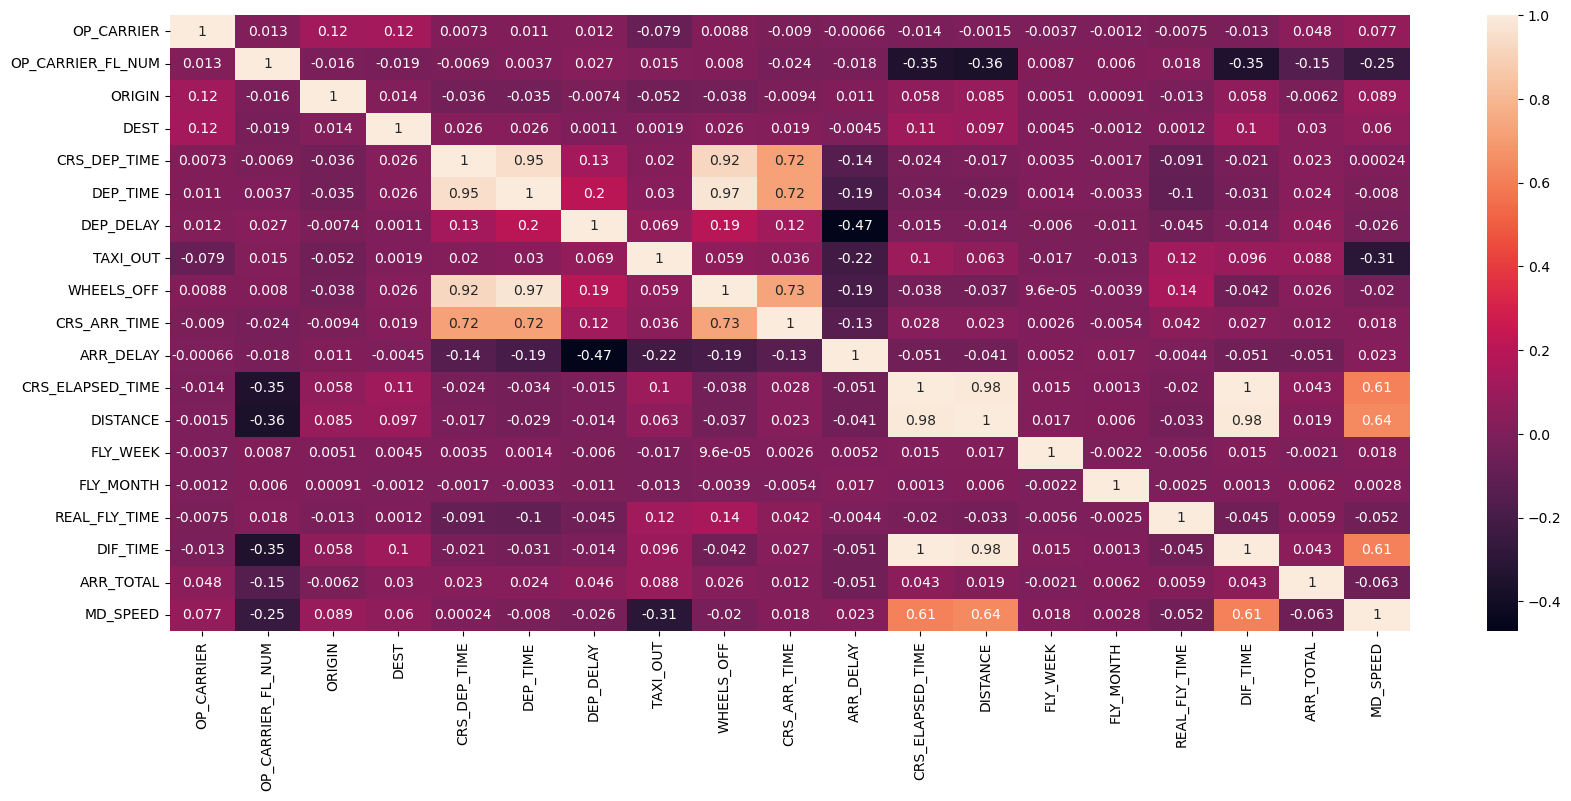

In [47]:
#Sacar las categoricas de cada uno de los df siguientes
cor = df_4.corr(numeric_only=True)

plt.figure(figsize=(20, 8))
sns.heatmap(cor, annot = True)

In [48]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import train_test_split

In [49]:
#X_7 = df_7.drop('ARR_DELAY', axis=1)
#y_7 = df_7['ARR_DELAY']

X_4 = df_4.drop('ARR_DELAY', axis=1)
y_4 = df_4['ARR_DELAY']

# Selección de características

In [51]:
from sklearn.feature_selection import mutual_info_classif

### Applying feature selection method
X_new = mutual_info_classif(X_4,y_4)

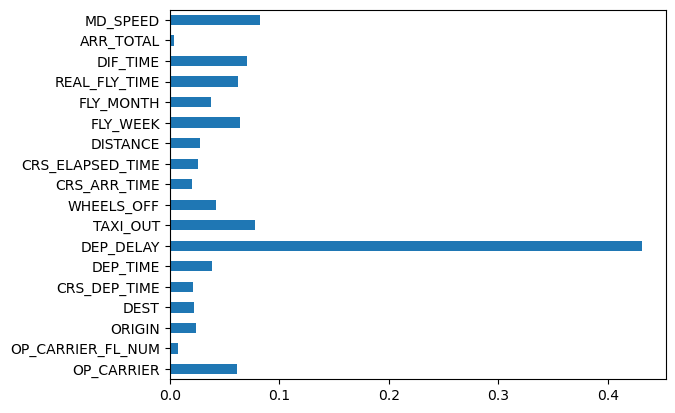

In [52]:
feat_imp = pd.Series(X_new, index=X_4.columns[:len(X_new)])
feat_imp.plot(kind='barh')
plt.show()

Filtrar las caracteristicas seleccionadas

In [54]:
selected_features = feat_imp[feat_imp > 0.028].index
X_train_filtered = X_4[selected_features]
X_test_filtered = X_4[selected_features]

No hace una diferencia la selección de caracteristicas por lo cual no se tremino por usar al final

# Reducción de dimensionalidad

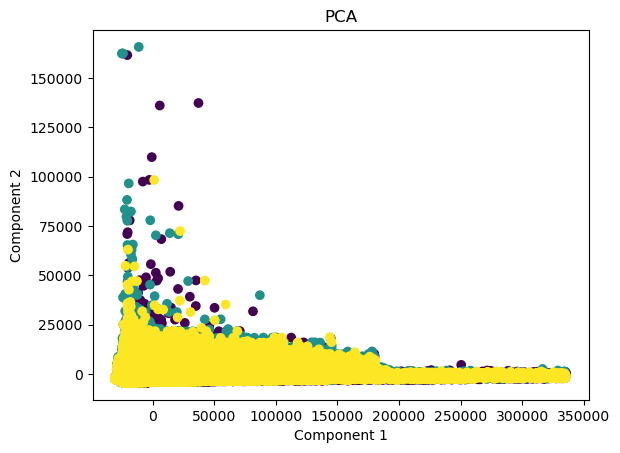

In [57]:
X_PCA = PCA(n_components=2).fit_transform(X_4) # 158seg

scatter = plt.scatter(X_PCA[:,0], X_PCA[:,1], c=y_4)
plt.title('PCA')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()

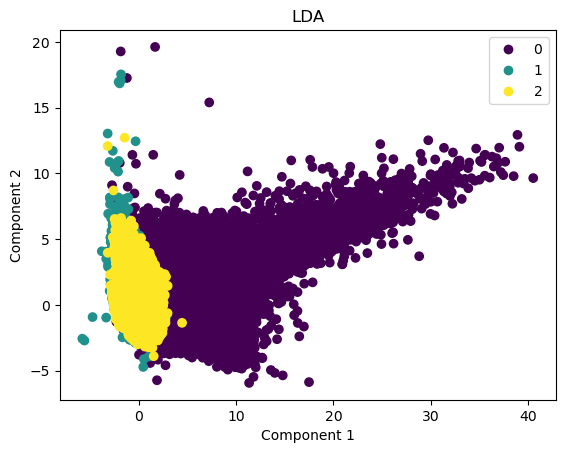

In [135]:
lda = LDA(n_components=2)
X_LDA = lda.fit_transform(X_4, y_4) #195

scatter = plt.scatter(X_LDA[:,0], X_LDA[:,1], c=y_4)
plt.title('LDA')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend(*scatter.legend_elements())
plt.show()

In [59]:
# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

X_train, X_test, y_train, y_test = train_test_split(X_LDA, y_4, test_size=0.2, random_state=42)

# Modelos de clasificación

In [61]:
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier ,GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score, confusion_matrix
from sklearn import tree, metrics

In [62]:
import numpy as np

def c_mat(y_test, y_pred,nombre_modelo):
    
    # Calcular matriz de confusión
    cm = confusion_matrix(y_test, y_pred)
    
    fp = cm.sum(axis=0) - np.diag(cm)
    fn = cm.sum(axis=1) - np.diag(cm)
    tp = np.diag(cm) 
    tn = cm.sum() - (fp + fn + tp)
    
    especificidad = tn / (tn + fp)

    print("Esfecificidad: ", especificidad)
    
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Matriz de confusión: {nombre_modelo}")
    plt.show()

## 1) Logistic Regression

Accuracy:  0.7085675220098215
F1:  0.7098527680940188
Esfecificidad:  [0.93410984 0.83424015 0.79437428]


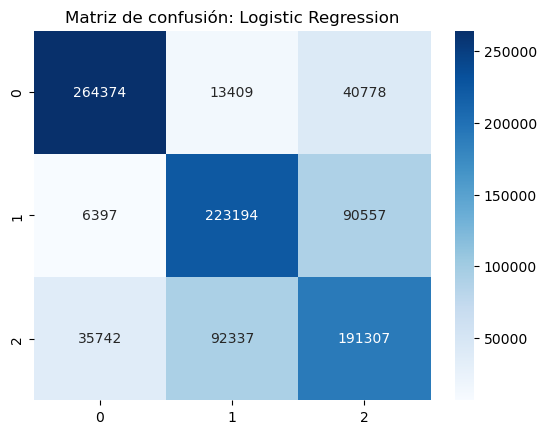

In [64]:
log_clf = LogisticRegression().fit(X_train, y_train)

y_pred_log = log_clf.predict(X_test)

# Accuracy
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred_log)) #0.768178
print("F1: ", metrics.f1_score(y_test, y_pred_log, average='macro')) #0.65

c_mat(y_test, y_pred_log, 'Logistic Regression')

## 2) Decision Tree

Accuracy:  0.7056941117530099
F1:  0.7078873473805026
Esfecificidad:  [0.93980461 0.82909395 0.78950195]


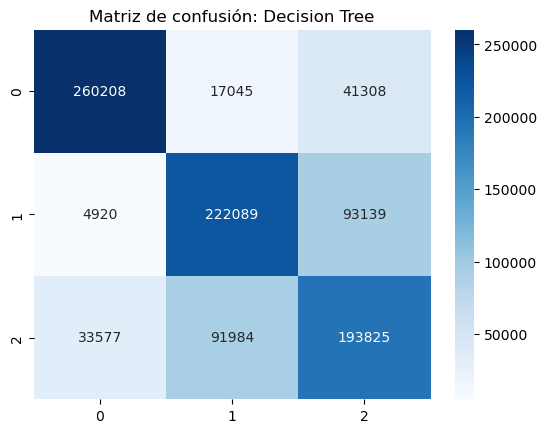

In [66]:
dt_clf = DecisionTreeClassifier(criterion="entropy", max_depth=5).fit(X_train, y_train)

y_pred_df = dt_clf.predict(X_test)

# Accuracy
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred_df)) #0.7056
print("F1: ", metrics.f1_score(y_test, y_pred_df, average='macro')) # 0.7078

c_mat(y_test, y_pred_df, 'Decision Tree')

## 3) Gaussian NB

Accuracy:  0.6848287487148977
F1:  0.6924716221452792
Esfecificidad:  [0.97095698 0.83500824 0.72110304]


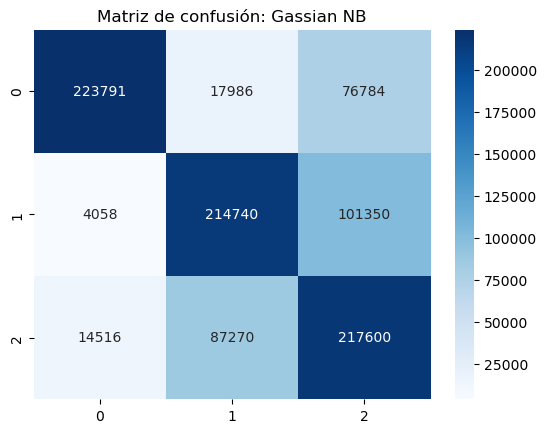

In [68]:
# Construir modelo con datos de training
clf_gnb = GaussianNB().fit(X_train, y_train)

y_pred_gnb = clf_gnb.predict(X_test)

# Accuracy
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred_gnb)) # 0.6848
print("F1: ", metrics.f1_score(y_test, y_pred_gnb, average='macro')) # 0.6924

c_mat(y_test, y_pred_gnb, 'Gassian NB')

## 4) KNeighbors

Accuracy:  0.6459349020712978
F1:  0.6419975528269595
Esfecificidad:  [0.86670763 0.81421811 0.78790967]


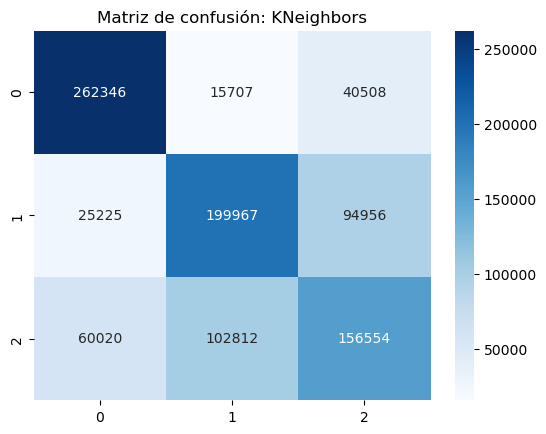

In [70]:
knn = KNeighborsClassifier(n_neighbors=3)
clf_knn = knn.fit(X_train, y_train)

y_pred_knn = clf_knn.predict(X_test)

# Accuracy
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred_knn)) # 0.6459
print("F1: ", metrics.f1_score(y_test, y_pred_knn, average='macro')) # 0.6419

c_mat(y_test, y_pred_knn, 'KNeighbors')

## 5) Hist Gradient Boosting

Accuracy:  0.7122821849607816
F1:  0.7111423809658154
Esfecificidad:  [0.93463678 0.80642122 0.82720456]


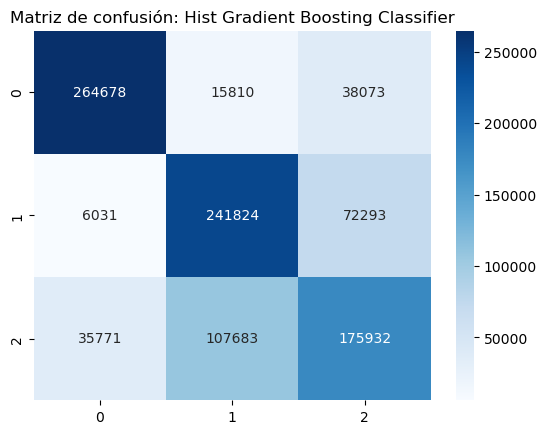

In [97]:
from sklearn.ensemble import HistGradientBoostingClassifier

hgc_clf = HistGradientBoostingClassifier().fit(X_train, y_train)

y_pred_hgc = hgc_clf.predict(X_test)

# Accuracy
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred_hgc)) # 0.7123
print("F1: ", metrics.f1_score(y_test, y_pred_hgc, average='macro')) # 0.7111

c_mat(y_test, y_pred_hgc, 'Hist Gradient Boosting Classifier')

## 6) Ada Boost

Accuracy:  0.7093899874229591
F1:  0.7096748925051837
Esfecificidad:  [0.93391907 0.82109172 0.80893177]


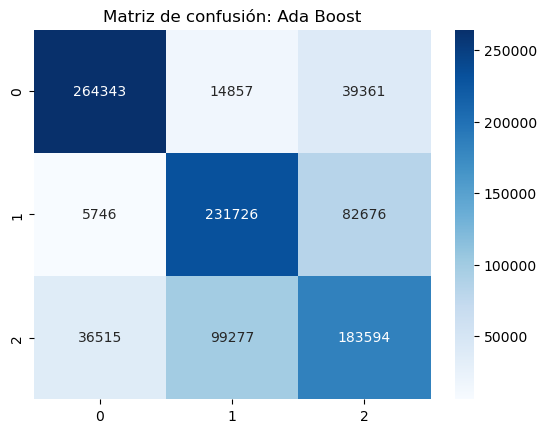

In [74]:
from sklearn.ensemble import AdaBoostClassifier

abc_clf = AdaBoostClassifier().fit(X_train, y_train)

y_pred_abc = abc_clf.predict(X_test)

# Accuracy
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred_abc)) # 0.7093
print("F1: ", metrics.f1_score(y_test, y_pred_abc, average='macro')) # 0.7096

c_mat(y_test, y_pred_abc, 'Ada Boost')

## 7) SVC

In [76]:
import numpy as np

index = np.random.choice(len(X_train), size=50000, replace=False)

X_samples = np.array([X_train[i] for i in index])
y_samples = np.array([y_train.iloc[i] for i in index])

print(X_samples.shape[0])
print(y_samples.shape[0])

50000
50000


Tomando solamente 50,000 elementos aleatorios

Accuracy:  0.7108533078661302
F1:  0.7104068850635882
Esfecificidad:  [0.94473163 0.79207834 0.82927906]


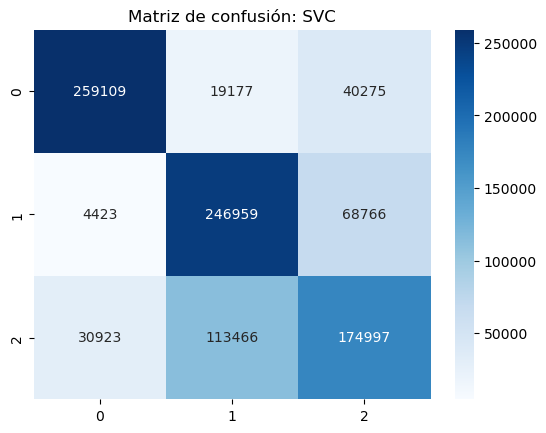

In [78]:
svc_clf = SVC().fit(X_samples, y_samples)

y_pred_svc = svc_clf.predict(X_test)

# Accuracy
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred_svc)) # 0.7108
print("F1: ", metrics.f1_score(y_test, y_pred_svc, average='macro')) # 0.7104

c_mat(y_test, y_pred_svc, 'SVC')

## 8) Extra Tree

Accuracy:  0.620022022868296
F1:  0.620174623014874
Esfecificidad:  [0.88919276 0.79418039 0.74653872]


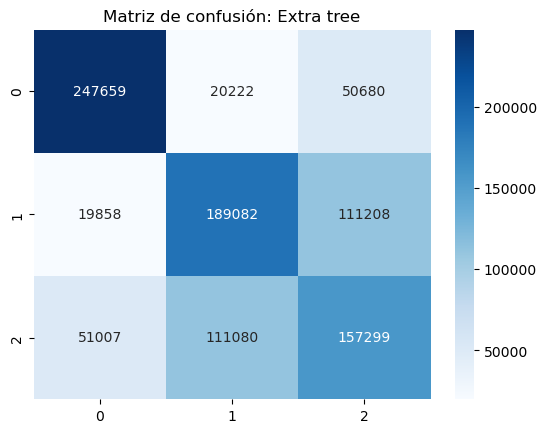

In [80]:
ext_clf = ExtraTreeClassifier().fit(X_train, y_train)

y_pred_ext = ext_clf.predict(X_test) 

print("Accuracy: ", metrics.accuracy_score(y_test, y_pred_ext)) # 0.6194
print("F1: ", metrics.f1_score(y_test, y_pred_ext, average='macro')) # 0.6201

c_mat(y_test, y_pred_ext, 'Extra tree')

## 9) LinearSVC

Accuracy:  0.7060938633434054
F1:  0.6993059846920544
Esfecificidad:  [0.89836037 0.80400723 0.85665616]


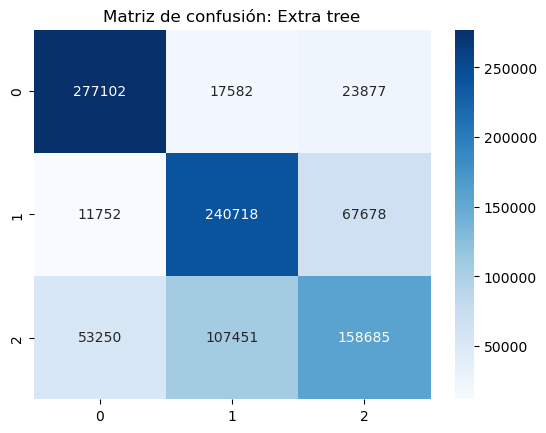

In [82]:
lsv_clf = LinearSVC().fit(X_samples, y_samples)

y_pred_lsv = lsv_clf.predict(X_test) 

print("Accuracy: ", metrics.accuracy_score(y_test, y_pred_lsv)) # 0.7060
print("F1: ", metrics.f1_score(y_test, y_pred_lsv, average='macro')) # 0.6993

c_mat(y_test, y_pred_lsv, 'Extra tree')

## 10) RandomForest

Accuracy:  0.7082397883299673
F1:  0.7053311214471648
Esfecificidad:  [0.92881223 0.79439044 0.83898927]


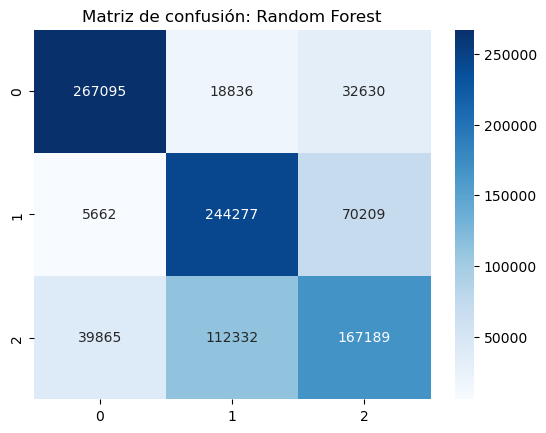

In [187]:
rf_clf = RandomForestClassifier(criterion="entropy", max_depth=5).fit(X_samples, y_samples)

y_pred_rf = rf_clf.predict(X_test) 

print("Accuracy: ", metrics.accuracy_score(y_test, y_pred_rf)) # 0.7
print("F1: ", metrics.f1_score(y_test, y_pred_rf, average='macro'))

c_mat(y_test, y_pred_rf, 'Random Forest')

## Gradient Boosting

In [86]:
gb_clf = GradientBoostingClassifier().fit(X_train, y_train)

NameError: name 'rg_clf' is not defined

Accuracy:  0.7122967972904566
F1:  0.7109665390145666
Esfecificidad:  [0.93387529 0.8056547  0.82875457]


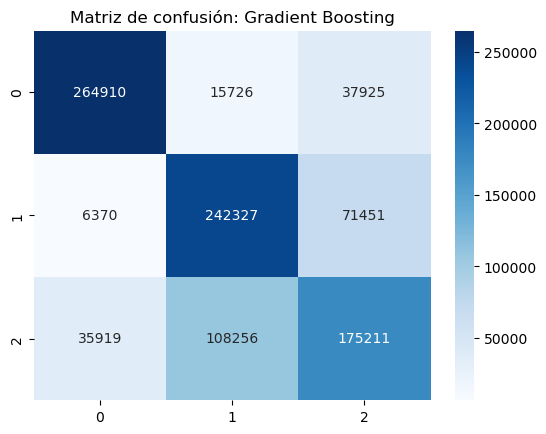

In [87]:
y_pred_gb = gb_clf.predict(X_test) 

print("Accuracy: ", metrics.accuracy_score(y_test, y_pred_gb)) # 0.7122
print("F1: ", metrics.f1_score(y_test, y_pred_gb, average='macro')) # 0.7109

c_mat(y_test, y_pred_gb, 'Gradient Boosting')

In [89]:
import joblib

joblib.dump(hgc_clf, 'hgc_clf.pkl')  # Guarda el modelo en un archivo

['hgc_clf.pkl']

In [91]:
joblib.dump(log_clf, 'log_clf.pkl')
joblib.dump(dt_clf, 'dt_clf.pkl')
joblib.dump(clf_gnb, 'clf_gnb.pkl')
joblib.dump(clf_knn, 'clf_knn.pkl')
joblib.dump(abc_clf, 'abc_clf.pkl')
joblib.dump(ext_clf, 'ext_clf.pkl')
joblib.dump(lsv_clf, 'lsv_clf.pkl')
joblib.dump(rf_clf, 'rf_clf.pkl')
joblib.dump(svc_clf, 'svc_clf.pkl')
joblib.dump(gb_clf, 'gb_clf.pkl')

['gb_clf.pkl']

Se guardan los modelos para no volver a entrenarlos

# Test

In [143]:
df = pd.read_csv('./test_airlines_delay_challenge.csv')
print(df.shape)
df.head()

(2250000, 13)


,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,CRS_ARR_TIME,CRS_ELAPSED_TIME,DISTANCE
0,2018-07-13,B6,574,TPA,EWR,929,924.0,-5.0,13.0,937.0,1215,166.0,997.0
1,2018-09-11,UA,256,DEN,SFO,750,750.0,0.0,18.0,808.0,928,158.0,967.0
2,2018-07-22,WN,3252,AUS,PHX,1710,1820.0,70.0,8.0,1828.0,1730,140.0,872.0
3,2018-04-30,AA,1422,BOS,JFK,1440,1431.0,-9.0,17.0,1448.0,1607,87.0,187.0
4,2018-05-09,WN,187,HOU,ATL,710,709.0,-1.0,11.0,720.0,1010,120.0,696.0


In [144]:
df_4.head()

,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,CRS_ARR_TIME,ARR_DELAY,CRS_ELAPSED_TIME,DISTANCE,FLY_WEEK,FLY_MONTH,REAL_FLY_TIME,DIF_TIME,ARR_TOTAL,MD_SPEED
0,5,3245,93,194,940.0,1018.0,38.0,12.0,1030.0,1245.0,0,125.0,785.0,3,4,0.200000,124.800000,4908.0,3925.0
1,2,2214,93,293,905.0,1224.0,199.0,26.0,1250.0,1021.0,0,76.0,247.0,4,4,0.433333,75.566667,58515.0,570.0
2,6,5682,247,339,1410.0,1455.0,45.0,10.0,1505.0,1656.0,0,106.0,475.0,2,6,0.833333,105.166667,681.0,570.0
3,15,2592,92,308,1615.0,1650.0,35.0,9.0,1659.0,1755.0,0,160.0,948.0,3,7,0.150000,159.850000,14887.0,6320.0
4,15,2008,23,114,1020.0,1049.0,29.0,8.0,1057.0,1500.0,0,220.0,1504.0,5,1,0.133333,219.866667,13239.0,11280.0


## Se agregan las características 

Se agregan las características en el mismo orden que el dataframe con el que se entreno el modelo

In [147]:
df['FLY_WEEK'] = pd.to_datetime(df['FL_DATE']).dt.dayofweek
df['FLY_MONTH'] = pd.to_datetime(df['FL_DATE']).dt.month

df['REAL_FLY_TIME'] = (df['WHEELS_OFF'] - df['DEP_TIME']) / 60
df['DIF_TIME'] = df['CRS_ELAPSED_TIME'] - df['REAL_FLY_TIME']
df['ARR_TOTAL'] = df.groupby(['ORIGIN', 'DEST'])['DEP_DELAY'].cumsum()

# Calcular la velocidad promedio
df['MD_SPEED'] = df['DISTANCE'] / df['REAL_FLY_TIME']


In [149]:
# Al obtener las caracteristicas de el retraso por año mes y día ya no se necesita el atributo FL_DATE
df = df.drop('FL_DATE', axis=1)

In [151]:
df.head()

,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,CRS_ARR_TIME,CRS_ELAPSED_TIME,DISTANCE,FLY_WEEK,FLY_MONTH,REAL_FLY_TIME,DIF_TIME,ARR_TOTAL,MD_SPEED
0,B6,574,TPA,EWR,929,924.0,-5.0,13.0,937.0,1215,166.0,997.0,4,7,0.216667,165.783333,-5.0,4601.538462
1,UA,256,DEN,SFO,750,750.0,0.0,18.0,808.0,928,158.0,967.0,1,9,0.966667,157.033333,0.0,1000.344828
2,WN,3252,AUS,PHX,1710,1820.0,70.0,8.0,1828.0,1730,140.0,872.0,6,7,0.133333,139.866667,70.0,6540.000000
3,AA,1422,BOS,JFK,1440,1431.0,-9.0,17.0,1448.0,1607,87.0,187.0,0,4,0.283333,86.716667,-9.0,660.000000
4,WN,187,HOU,ATL,710,709.0,-1.0,11.0,720.0,1010,120.0,696.0,2,5,0.183333,119.816667,-1.0,3796.363636


In [153]:
for col in df.select_dtypes(include=['object']).columns:
    df[col] = label_encoder.fit_transform(df[col])

In [141]:
df_4.head()

,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,CRS_ARR_TIME,ARR_DELAY,CRS_ELAPSED_TIME,DISTANCE,FLY_WEEK,FLY_MONTH,REAL_FLY_TIME,DIF_TIME,ARR_TOTAL,MD_SPEED
0,5,3245,93,194,940.0,1018.0,38.0,12.0,1030.0,1245.0,0,125.0,785.0,3,4,0.200000,124.800000,4908.0,3925.0
1,2,2214,93,293,905.0,1224.0,199.0,26.0,1250.0,1021.0,0,76.0,247.0,4,4,0.433333,75.566667,58515.0,570.0
2,6,5682,247,339,1410.0,1455.0,45.0,10.0,1505.0,1656.0,0,106.0,475.0,2,6,0.833333,105.166667,681.0,570.0
3,15,2592,92,308,1615.0,1650.0,35.0,9.0,1659.0,1755.0,0,160.0,948.0,3,7,0.150000,159.850000,14887.0,6320.0
4,15,2008,23,114,1020.0,1049.0,29.0,8.0,1057.0,1500.0,0,220.0,1504.0,5,1,0.133333,219.866667,13239.0,11280.0


In [155]:
X_LDA_test = lda.transform(df)

Reduciendo la dimensionalidad con el lda ya entrenado

In [161]:
print(X_LDA_test.shape)

(2250000, 2)


In [165]:
y_pred_test_hgc = hgc_clf.predict(X_LDA_test)

In [204]:
arr_delay_back = {
    0 : "Delay",
    1 : "On time",
    2 : "Early"
}

pred_hgc = np.vectorize(arr_delay_back.get)(y_pred_test_hgc)
print("Hist Gradient Boost: ",pred_hgc)

Hist Gradient Boost:  ['On time' 'Early' 'Delay' ... 'On time' 'Early' 'Early']


Guardando las predicciones del mejor modelo

In [206]:
np.savetxt('predicted.csv', pred_hgc, delimiter=',', fmt='%s', header='Predicted', comments='')

print("Archivo guardado como 'predicted.csv'.")

Archivo guardado como 'predicted.csv'.
